In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f as fisher_f
def SSE(y1, y2):
    # Sum of square of error
    s = 0
    for (a, b) in zip(y1, y2):
        temp = a-b
        temp = temp * temp
        s = s + temp
    return int(s)

In [2]:
df = pd.read_csv('./GOOGL_weekly_return_volatility_detailed.csv')
year1 = df[df.Year == 2019]
year2 = df[df.Year == 2020]

year1 = year1[['Date','Week_Number', 'Close']]
year2 = year2[['Date', 'Week_Number', 'Close']]


In [3]:
# cut data into month year1
monthPirceDic1 = { i:[] for i in range(1, 13)}

for (d, p) in zip(year1.Date, year1.Close):
    m = d[5:7]
    m = int(m)
    monthPirceDic1[m].append(p)


# cut data into month year2
monthPirceDic2 = { i:[] for i in range(1, 13)}

for (d, p) in zip(year2.Date, year2.Close):
    m = d[5:7]
    m = int(m)
    monthPirceDic2[m].append(p)

monthPirceDic1

{1: [1054.6800537109375,
  1025.469970703125,
  1078.0699462890625,
  1075.9200439453125,
  1085.3699951171875,
  1081.6500244140625,
  1078.8299560546875,
  1064.469970703125,
  1051.510009765625,
  1086.510009765625,
  1089.510009765625,
  1099.1199951171875,
  1107.300048828125,
  1078.6300048828125,
  1084.4100341796875,
  1084.0,
  1101.510009765625,
  1079.8599853515625,
  1070.06005859375,
  1097.989990234375,
  1125.8900146484375],
 2: [1118.6199951171875,
  1141.4200439453125,
  1151.8699951171875,
  1122.8900146484375,
  1105.9100341796875,
  1102.3800048828125,
  1102.1199951171875,
  1127.5799560546875,
  1128.6300048828125,
  1129.199951171875,
  1119.6300048828125,
  1126.510009765625,
  1120.5899658203125,
  1104.2099609375,
  1116.56005859375,
  1117.3299560546875,
  1122.010009765625,
  1122.8900146484375,
  1126.550048828125],
 3: [1148.52001953125,
  1153.4200439453125,
  1169.18994140625,
  1164.93994140625,
  1150.8499755859375,
  1149.969970703125,
  1179.26000976

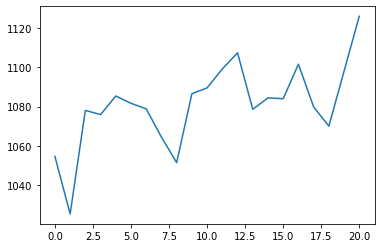

In [5]:
plt.plot(monthPirceDic1[1])

# Count SSE for one regression function for both years

In [34]:
# for year1
sse1 = []
for m in range(1, 13):
    yTest = monthPirceDic1[m]
    x = [i for i in range(len(yTest))]
    degree = 1
    weights = np.polyfit(x, yTest, degree)
    model = np.poly1d(weights)
    yPredict = model(x)
    sse1.append(SSE(yPredict, yTest))

# for year2
sse2 = []
for m in range(1, 13):
    yTest = monthPirceDic2[m]
    x = [i for i in range(len(yTest))]
    degree = 1
    weights = np.polyfit(x, yTest, degree)
    model = np.poly1d(weights)
    yPredict = model(x)
    sse2.append(SSE(yPredict, yTest))


print(sse1)
print(sse2)

[5539, 2777, 8187, 7701, 4998, 5952, 14067, 5138, 3743, 3043, 2374, 4138]
[11838, 52057, 90785, 23337, 4959, 10891, 13646, 6436, 34260, 25352, 21744, 8193]


In [67]:
# find trend for year1
kSSEList1 = []
for m in range(1, 13):
    yTest = monthPirceDic1[m]
    kIndex = [i for i in range(1, len(yTest)-2)]
    degree = 1
    trend = []
    for k in kIndex:
        yTestF = yTest[0:k + 1]
        xf = [i for i in range(len(yTestF))]
        weightf = np.polyfit(xf, yTestF, degree)
        wf = weightf[0]
        model = np.poly1d(weightf)
        yPredictF = model(xf)



        yTestS = yTest[k+1:]
        xs = [i for i in range(len(yTestS))]
        weights = np.polyfit(xs, yTestS, degree)
        ws = weights[0]
        model = np.poly1d(weights)
        ypredictS = model(xs)

        if wf * ws < 0: # then it is a trend change
            sseTotal = SSE(yPredictF, yTestF) + SSE(ypredictS, yTestS)
            trend.append((k, sseTotal))

    trend = sorted(trend, key = lambda x: x[1])
    kSSEList1.append(trend[0])

# find trend for year2
kSSEList2 = []
for m in range(1, 13):
    yTest = monthPirceDic2[m]
    kIndex = [i for i in range(1, len(yTest)-2)]
    degree = 1
    trend = []
    for k in kIndex:
        yTestF = yTest[0:k + 1]
        xf = [i for i in range(len(yTestF))]
        weightf = np.polyfit(xf, yTestF, degree)
        wf = weightf[0]
        model = np.poly1d(weightf)
        yPredictF = model(xf)


        yTestS = yTest[k+1:]
        xs = [i for i in range(len(yTestS))]
        weights = np.polyfit(xs, yTestS, degree)
        ws = weights[0]
        model = np.poly1d(weights)
        ypredictS = model(xs)

        if wf * ws < 0: # then it is a trend change
            sseTotal = SSE(yPredictF, yTestF) + SSE(ypredictS, yTestS)
            trend.append((k, sseTotal))
           

    trend = sorted(trend, key = lambda x: x[1])
    try:
        kSSEList2.append(trend[0])
    except:
        kSSEList2.append('NA')

print(kSSEList1)
print()
print(kSSEList2)

[(1, 3774), (5, 2129), (12, 1934), (18, 1725), (3, 4355), (15, 706), (17, 2039), (1, 4032), (6, 1302), (18, 2076), (9, 1414), (5, 824)]

[(14, 1901), (10, 5309), (9, 22954), (2, 13913), 'NA', (15, 8329), (14, 5446), (16, 4019), (15, 16401), (5, 16639), (8, 15210), (15, 3927)]


In [76]:
# compute f test for year 1
for i in range(12):
    l = sse1[i]
    l12 = kSSEList1[i][1]

    n = len(monthPirceDic1[i+1])

    F = (l - l12) / 2
    F = F * (n-4) / (l + l12)

    pValue = fisher_f.cdf(F, 2, n-4)

    print(pValue)

print()
# compute f test for year 2

for i in range(12):

    l = sse2[i]
    l12 = kSSEList2[i][1]
    
    n = len(monthPirceDic2[i+1])

    try:
        F = (l - l12) / 2
        F = F * (n-4) / (l + l12)

        pValue = fisher_f.cdf(F, 2, n-4)

        print(pValue)

    except:
        l12 = l
        F = (l - l12) / 2
        F = F * (n-4) / (l + l12)

        pValue = fisher_f.cdf(F, 2, n-4)

        print(pValue)



0.7712610842199434
0.6056221514883667
0.9832473532933048
0.984605071042007
0.4503044995878222
0.9904234962965911
0.9933960176375111
0.6411547840512809
0.9574508604140222
0.806756353275141
0.8358676905352113
0.9870697071065551

0.9902051512527427
0.9885556594339924
0.9851479019341667
0.8529599406628473
0.0
0.6757345582690379
0.9598815109869274
0.8292883926367747
0.9232144618517398
0.8167576050584244
0.7281457321650684
0.9229536287346112
